In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [2]:
# importing the dataset
global_plastic = pd.read_csv('Case Studies/global-plastics-production/Plastic Waste Around the World.csv')

In [3]:
# getting view of dataset and also fetching first five rows
global_plastic.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [4]:
# getting to know about data type and no of rows 
global_plastic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 165 non-null    object 
 1   Total_Plastic_Waste_MT  165 non-null    float64
 2   Main_Sources            165 non-null    object 
 3   Recycling_Rate          165 non-null    float64
 4   Per_Capita_Waste_KG     165 non-null    float64
 5   Coastal_Waste_Risk      165 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.9+ KB


In [5]:
global_plastic.describe(include='all') # getting the descriptive statistics of the DataFrame

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
count,165,165.000000,165,165.000000,165.000000,165
unique,165,NaN,10,NaN,NaN,4
top,China,NaN,Consumer_Packaging,NaN,NaN,High
freq,1,NaN,131,NaN,NaN,74
mean,NaN,1.723515,NaN,13.096364,122.255152,NaN
std,NaN,6.001944,NaN,16.687354,222.849695,NaN
min,NaN,0.010000,NaN,0.100000,2.600000,NaN
25%,NaN,0.120000,NaN,1.200000,17.300000,NaN
50%,NaN,0.510000,NaN,5.400000,54.900000,NaN
75%,NaN,1.330000,NaN,16.400000,127.500000,NaN


#### We can see that top country for global waste is *China* and Top main source for waste is Consumer Packing in terms of coastal Waste Risk High is the most frequent one

In [6]:
# null and na checking

In [7]:
global_plastic.isnull().sum()

Country                   0
Total_Plastic_Waste_MT    0
Main_Sources              0
Recycling_Rate            0
Per_Capita_Waste_KG       0
Coastal_Waste_Risk        0
dtype: int64

In [8]:
global_plastic.isna().sum()

Country                   0
Total_Plastic_Waste_MT    0
Main_Sources              0
Recycling_Rate            0
Per_Capita_Waste_KG       0
Coastal_Waste_Risk        0
dtype: int64

In [9]:
global_plastic.nunique()

Country                   165
Total_Plastic_Waste_MT    122
Main_Sources               10
Recycling_Rate             83
Per_Capita_Waste_KG       146
Coastal_Waste_Risk          4
dtype: int64

In [10]:
# We will use pandas profiling library which is a pandas library to get a overall description of data 

In [11]:
from ydata_profiling import ProfileReport
import webbrowser

In [12]:
profile = ProfileReport(global_plastic,explorative=True)

In [13]:
# To display the report in Jupyter Notebook 

In [14]:
profile.to_file("plastic_waste_report.html")
webbrowser.open("plastic_waste_report.html")#If you want to see in other broswer since

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

True

In [15]:
# from IPython.display import IFrame
# IFrame(src="plastic_waste_report.html", width="100%", height="800px") #if you want to see in jupyter notebook itself

## Univariate Analysis

### We will Check how Total Plastic Waste is Distributed and if any outliers are there

In [16]:
global_plastic['Total_Plastic_Waste_MT'].sum()

284.38

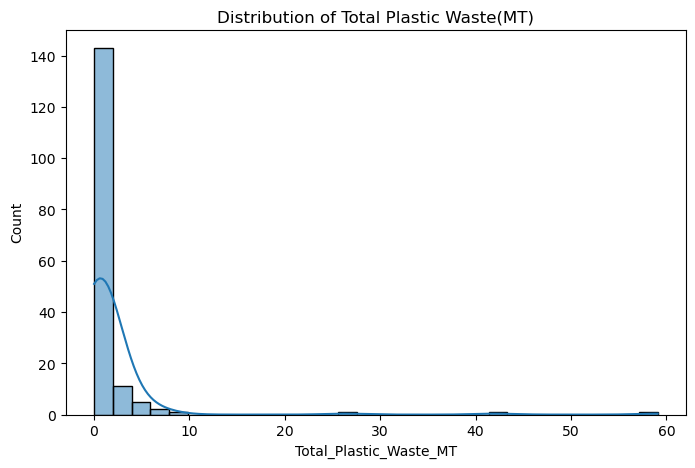

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(data = global_plastic['Total_Plastic_Waste_MT'],bins=30 , kde=True)
plt.title("Distribution of Total Plastic Waste(MT)")
plt.show()

- The distribution is highly right-skewed, indicating that most countries generate a small amount of plastic waste, while a few outliers contribute significantly higher amounts.
- The presence of extreme values suggests that only a handful of countries are responsible for the majority of plastic waste generation.

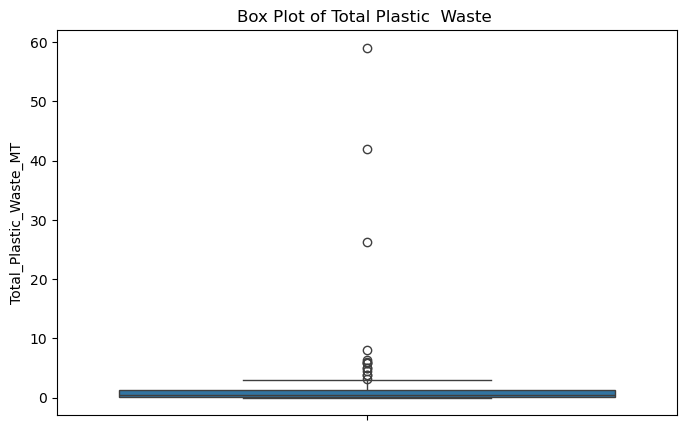

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(data = global_plastic['Total_Plastic_Waste_MT'])
plt.title("Box Plot of Total Plastic  Waste ")
plt.show()

- There are multiple outliers, further confirming that some countries have exceptionally high plastic waste generation.
- The median and interquartile range (IQR) show that for most countries, plastic waste levels are relatively low, while a few significantly impact the overall distribution.

### Lets Do Multivaraite analysis and check for 'Total_Plastic_Waste_MT', 'Recycling_Rate', 'Per_Capita_Waste_KG'

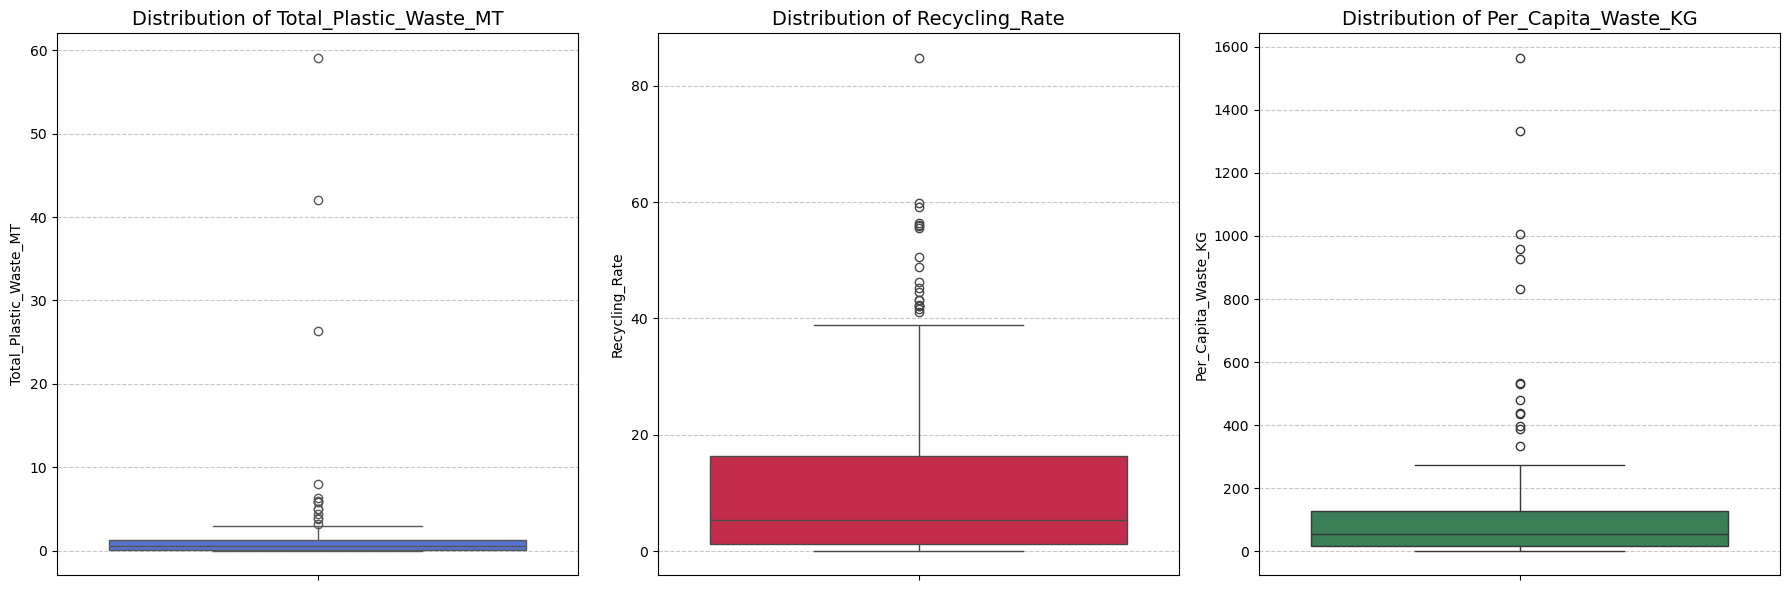

In [19]:
col = ['Total_Plastic_Waste_MT', 'Recycling_Rate', 'Per_Capita_Waste_KG']
colors = ['royalblue', 'crimson', 'seagreen'] 

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, column in enumerate(col):
    sns.boxplot(y=global_plastic[column], ax=axes[i], color=colors[i], showfliers=True)  # Using 'color' instead of 'palette'
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel("")  # Remove x-axis label for cleaner look
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Total Plastic Waste (MT): Reinforces the presence of extreme outliers, meaning a few countries dominate global plastic waste production.
- Recycling Rate: Shows a wide range with many outliers, indicating that some countries have very high recycling rates while others lag far behind.
- Per Capita Waste (KG): Also has multiple outliers, meaning some countries generate significantly more plastic waste per person compared to others.

## Bivariate Analysis 

## Is there a correlation between total plastic waste and recycling rate?

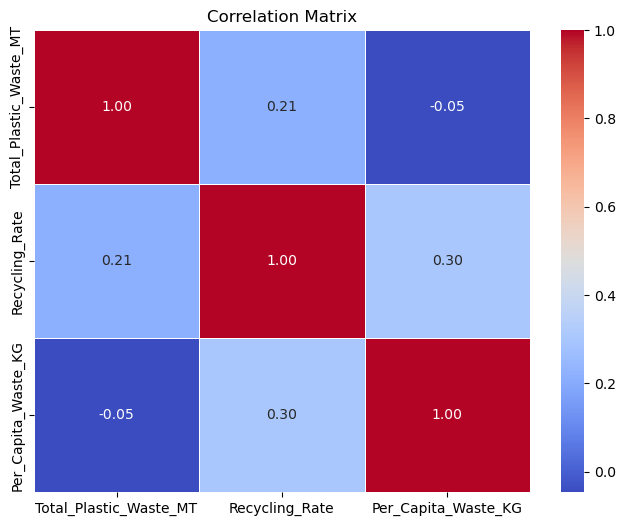

In [20]:
correlation_matrix = global_plastic.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

- Total Plastic Waste (MT) vs. Per Capita Waste (KG): A weak negative correlation (-0.05) suggests that high total waste does not necessarily mean high per capita waste.
- Recycling Rate vs. Per Capita Waste (KG): A weak positive correlation (0.30) indicates that countries with higher plastic waste per capita may have slightly better recycling practices.
- Total Plastic Waste (MT) vs. Recycling Rate: A weak positive correlation (0.21) suggests that total waste and recycling rates are not strongly linked, meaning high waste generation does not necessarily lead to better recycling efforts.

## Top 10 Plastic Waste Producing Countries 

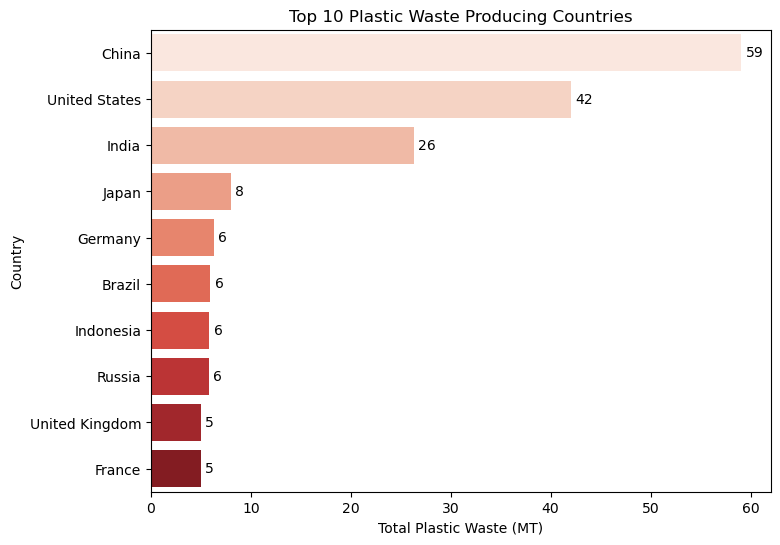

In [30]:
Top_Plastic_Waste_Countries = global_plastic.nlargest(10, 'Total_Plastic_Waste_MT')

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    y=Top_Plastic_Waste_Countries['Country'], 
    x=Top_Plastic_Waste_Countries['Total_Plastic_Waste_MT'], 
    hue=Top_Plastic_Waste_Countries['Country'], 
    palette='Reds'
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.legend([], [], frameon=False)

plt.title("Top 10 Plastic Waste Producing Countries")
plt.xlabel("Total Plastic Waste (MT)")
plt.ylabel("Country")

plt.show()

- China (59 MT), the U.S. (42 MT), and India (26 MT) are the largest plastic waste producers, contributing significantly more than other countries.
- Plastic waste generation drops sharply after the top three, with Germany, Brazil, Indonesia, and Russia producing around 6 MT each.
- Developed and industrialized nations remain key contributors, highlighting the need for better waste management policies.

## Top 10 Countries with Highest Recycling Rates

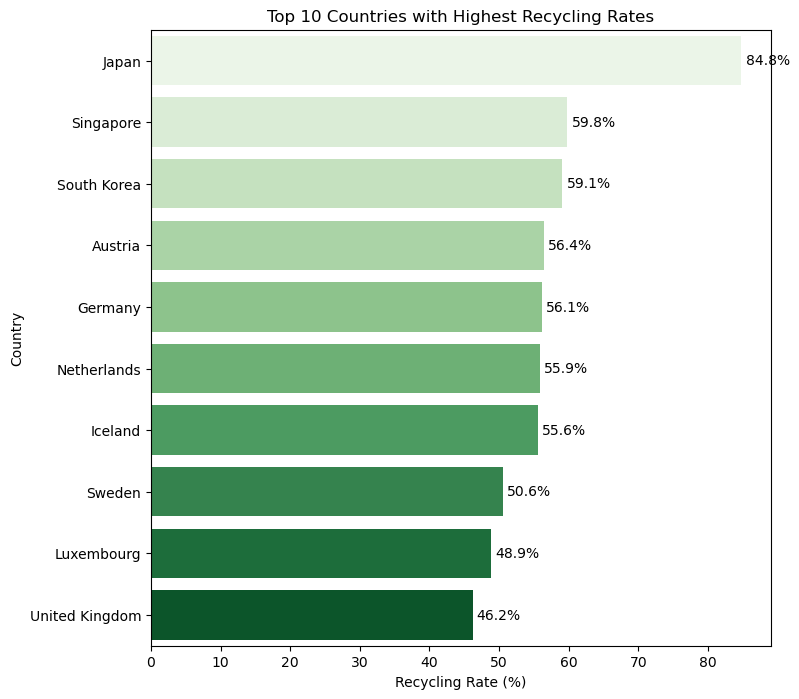

In [29]:
Top_recycling_Countries = global_plastic.nlargest(10, 'Recycling_Rate')

plt.figure(figsize=(8, 8))
ax = sns.barplot(y=Top_recycling_Countries['Country'], 
                 x=Top_recycling_Countries['Recycling_Rate'], 
                 hue=Top_recycling_Countries['Country'], 
                 palette='Greens')

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", padding=3)
plt.title("Top 10 Countries with Highest Recycling Rates")
plt.xlabel("Recycling Rate (%)")
plt.ylabel("Country")
plt.legend([], [], frameon=False) 
plt.show()

- Japan leads globally with an 84.8% recycling rate, followed by Singapore (59.8%) and South Korea (59.1%), showcasing efficient waste management policies.
- European countries dominate the list, with Germany, Austria, and the Netherlands all recycling over 55% of their plastic waste.
- Despite being a top plastic waste producer, the U.S. is absent, indicating a gap in recycling efficiency.

In [68]:
global_plastic['Coastal_Waste_Risk'].value_counts()

Coastal_Waste_Risk
High         74
Low          54
Medium       33
Very_High     4
Name: count, dtype: int64

In [69]:
high_risk = global_plastic[global_plastic['Coastal_Waste_Risk']=='High']['Coastal_Waste_Risk'].count()
low_risk = global_plastic[global_plastic['Coastal_Waste_Risk']=='Low']['Coastal_Waste_Risk'].count()
medium_risk = global_plastic[global_plastic['Coastal_Waste_Risk']=='Medium']['Coastal_Waste_Risk'].count()
very_high_risk = global_plastic[global_plastic['Coastal_Waste_Risk']=='Very_High']['Coastal_Waste_Risk'].count()

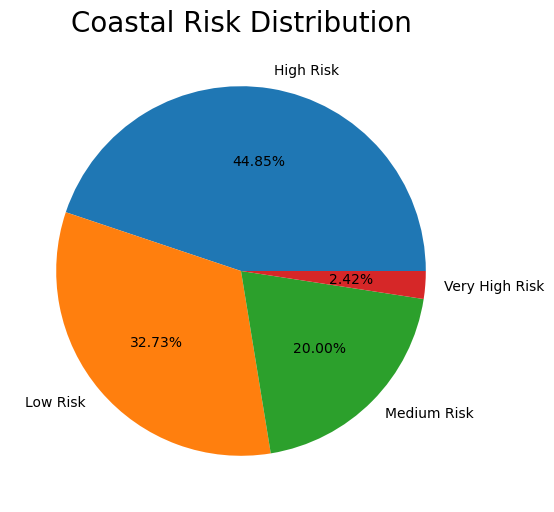

In [70]:
plt.figure(figsize=(10,6))
index_values = [high_risk, low_risk, medium_risk, very_high_risk]
index_labels = ['High Risk', 'Low Risk', 'Medium Risk', 'Very High Risk']
plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')
plt.title('Coastal Risk Distribution', fontsize=20)
plt.show()

- High-risk areas dominate (44.85%), indicating significant environmental threats from plastic waste accumulation.
- Low-risk regions (32.73%) still face plastic waste concerns, while medium-risk areas make up 20%.
- Very high-risk areas are the smallest category (2.42%), but they likely require urgent intervention.

## Scatter Plot for Per_Capita_Waste and Total Plastic Waste

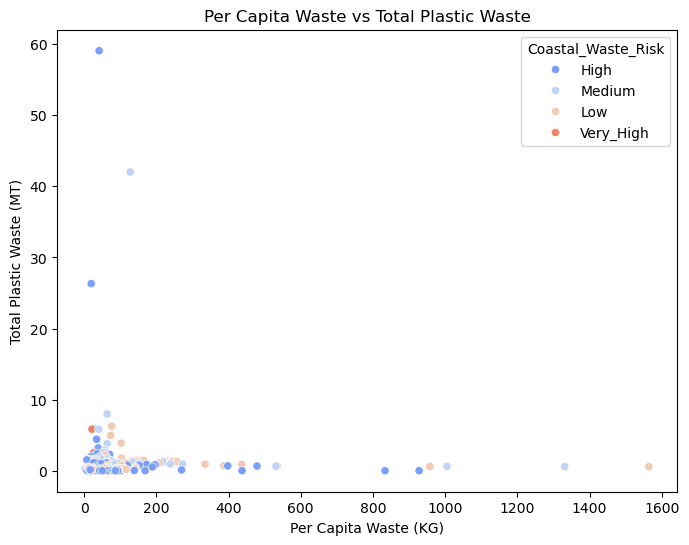

In [71]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=global_plastic['Per_Capita_Waste_KG'], y = global_plastic['Total_Plastic_Waste_MT'] ,hue=global_plastic["Coastal_Waste_Risk"], palette="coolwarm")
plt.title("Per Capita Waste vs Total Plastic Waste")
plt.xlabel("Per Capita Waste (KG)")
plt.ylabel("Total Plastic Waste (MT)")
plt.show()

- Most data points are clustered in the lower-left region, indicating that a majority of countries have relatively low total and per capita plastic waste.
- The presence of a few extreme values on the x-axis (Per Capita Waste) and y-axis (Total Plastic Waste) highlights significant disparities between countries.
- Different coastal waste risk categories are scattered throughout, with "Very High" and "High" risk categories appearing even at lower waste levels, suggesting that coastal vulnerability is not solely dependent on the amount of plastic waste.

In [72]:
world = gpd.read_file('Case Studies/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

In [73]:
missing_countries = set(global_plastic['Country'])- set(world['SOVEREIGNT'])
print("Countries in global_plastic but not in world map:", missing_countries)

Countries in global_plastic but not in world map: {'Micronesia', 'New Caledonia', 'United States', 'Democratic Republic of Congo', 'Cape Verde', 'Czech Republic', 'Tanzania', 'Eswatini', 'Sao Tome and Principe', 'Republic of Congo'}


In [74]:
world[world['SOVEREIGNT'].str.contains('Republic', case=False, na=False)]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
18,Admin-0 country,0,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((32.92086 -9.4079, 32.90546 -9...."
30,Admin-0 country,0,4,Republic of the Congo,COG,0,2,Sovereign country,1,Republic of the Congo,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.62639 3.47687, 18.63455 3.44922, ..."
31,Admin-0 country,0,2,Democratic Republic of the Congo,COD,0,2,Sovereign country,1,Democratic Republic of the Congo,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((18.62639 3.47687, 18.593 3.709..."
84,Admin-0 country,0,4,Central African Republic,CAF,0,2,Sovereign country,1,Central African Republic,...,None,None,None,None,None,None,None,None,None,"POLYGON ((22.86106 10.91915, 22.86323 10.89182..."
96,Admin-0 country,0,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.24283 46.10809, 20.30566 46.05357..."
113,Admin-0 country,0,5,Dominican Republic,DOM,0,2,Sovereign country,1,Dominican Republic,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-71.75744 19.71011, -71.73827 ..."


## since some of countries are being name as other we need to rename it in proper format so we can merge with our dataset

In [75]:
world = world.rename(columns={'SOVEREIGNT': 'Country'})
name_mapping = {
    "United States of America": "United States",
    "Republic of the Congo": "Republic of Congo",
    "United Republic of Tanzania": "Tanzania",
    "Federated States of Micronesia": "Micronesia",
    "New Caledonia": "New Caledonia",
    "Cabo Verde": "Cape Verde",
    "Democratic Republic of the Congo": "Democratic Republic of Congo",
    "Czechia": "Czech Republic",
    "São Tomé and Principe": "Sao Tome and Principe",
    "eSwatini": "Eswatini"
}

# renaming to the world dataset
world['Country'] = world['Country'].replace(name_mapping)


In [76]:
missing_countries = set(global_plastic['Country'])- set(world['Country'])
print("Countries in global_plastic but not in world map:", missing_countries)

Countries in global_plastic but not in world map: {'New Caledonia'}


In [77]:
## Since New Caledonia is not there we need to add that column 

In [78]:
new_row = pd.DataFrame({"Country": ["New Caledonia"]})
# Appending to world dataset
world = gpd.GeoDataFrame(pd.concat([world, new_row], ignore_index=True))

In [79]:
from shapely.geometry import Point
new_caledonia_point = Point(165.6, -21.2)

# Adding geometry and other missing data
world.loc[world['Country'] == 'New Caledonia', 'geometry'] = new_caledonia_point
world.loc[world['Country'] == 'New Caledonia', 'SOVEREIGNT'] = 'France'

world['POP_EST'] = world['POP_EST'].astype(object)
world['GDP_MD'] = world['GDP_MD'].astype(object)

world.loc[world['Country'] == 'New Caledonia', ['POP_EST', 'GDP_MD']] = 'No Data'

world.fillna("No Data", inplace=True)

world[world['Country'] == 'New Caledonia']


C:\Users\pc\AppData\Local\Temp\ipykernel_14012\2152023306.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Data' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  world.fillna("No Data", inplace=True)


,featurecla,scalerank,LABELRANK,Country,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,SOVEREIGNT
258,No Data,No Data,No Data,New Caledonia,No Data,No Data,No Data,No Data,No Data,No Data,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,POINT (165.6 -21.2),France


In [80]:
missing_countries = set(global_plastic['Country'])- set(world['Country'])
print("Countries in global_plastic but not in world map:", missing_countries)

Countries in global_plastic but not in world map: set()


In [81]:
merged = world.merge(global_plastic, on="Country", how="left")

In [82]:
top_10 = merged.nlargest(10,'Total_Plastic_Waste_MT')
top_10['Country']

9              China
166            China
253            China
154    United States
204    United States
208    United States
210    United States
245    United States
247    United States
248    United States
Name: Country, dtype: object

 # Top 10 Countries with Highest Plastic Waste Using World Map

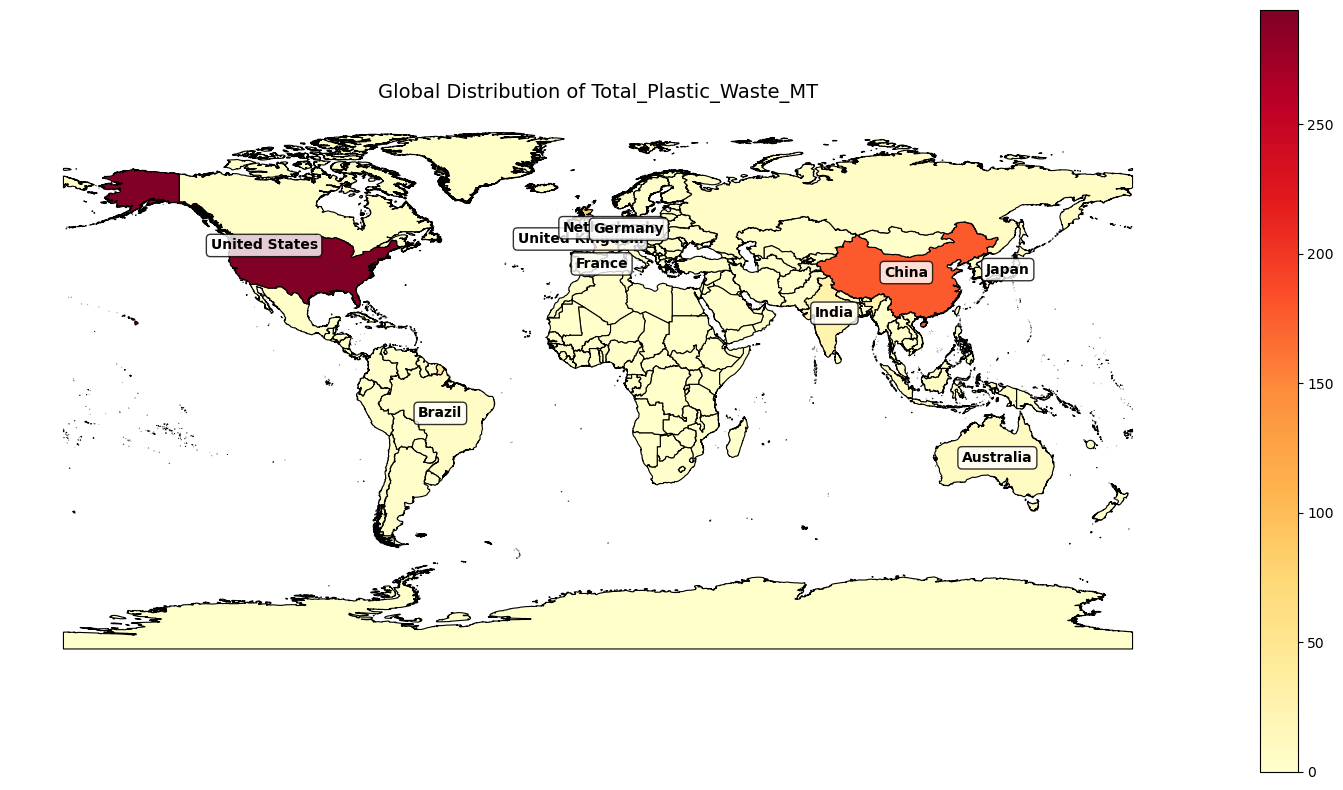

In [83]:
# Dissolve to avoid duplicate geometries
"""The reason we are seeing repeated countries like China and United States in nlargest() 
result is because merged is a GeoDataFrame — and when we merged our dataset, 
there might be multiple geometry rows for the same country due to islands or territories."""

merged_dissolved = merged.dissolve(by='Country', aggfunc='sum').reset_index() 
top_10 = merged_dissolved.nlargest(10, 'Total_Plastic_Waste_MT')

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
merged_dissolved.plot(column='Total_Plastic_Waste_MT', cmap="YlOrRd", linewidth=0.8, edgecolor='black', legend=True, ax=ax)

# Adding Labels for Top 10 Countries
for idx, row in top_10.iterrows():
    if row['geometry'] is not None:
        centroid = row['geometry'].centroid
        if centroid.is_empty == False:
            ax.annotate(text=row['Country'],
                        xy=(centroid.x, centroid.y),
                        fontsize=10, color='black', weight='bold',
                        ha='center', va='center',
                        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black', alpha=0.8))

ax.set_title(f"Global Distribution of {'Total_Plastic_Waste_MT'}", fontsize=14)
ax.axis('off')

plt.tight_layout()
plt.show()

## World Distribution of Coastal_Waste_Risk

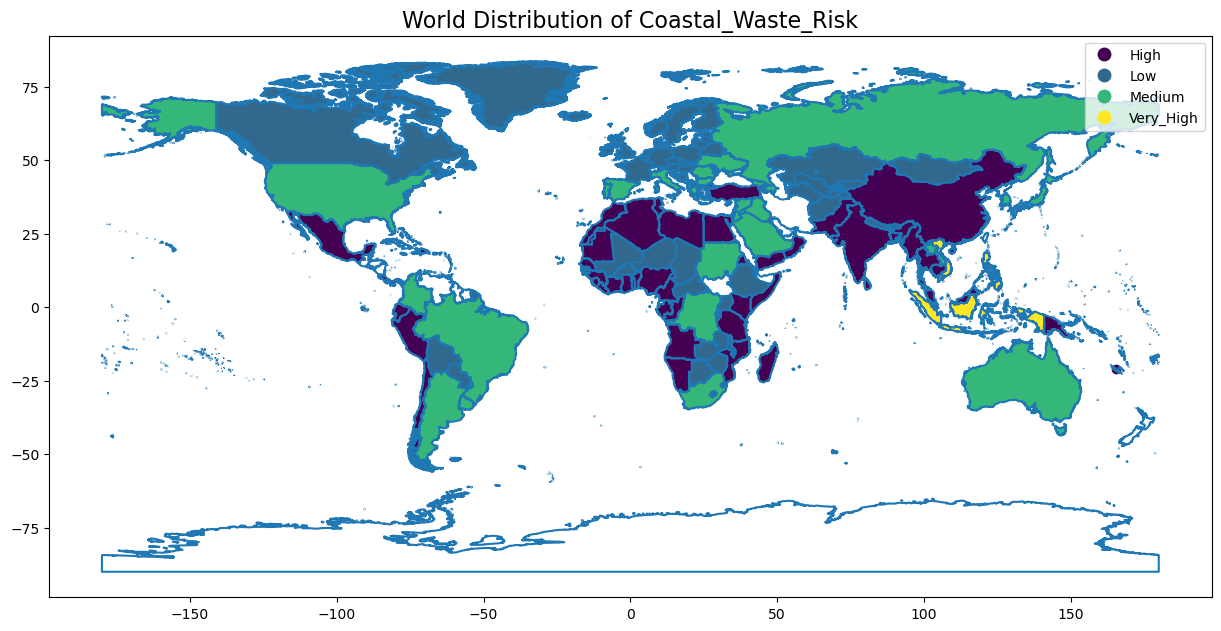

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax)
merged.plot(column='Coastal_Waste_Risk', ax=ax, legend=True, cmap='viridis')
plt.title('World Distribution of Coastal_Waste_Risk', fontsize=16)
plt.show()

## World Distribution of Main_Sources

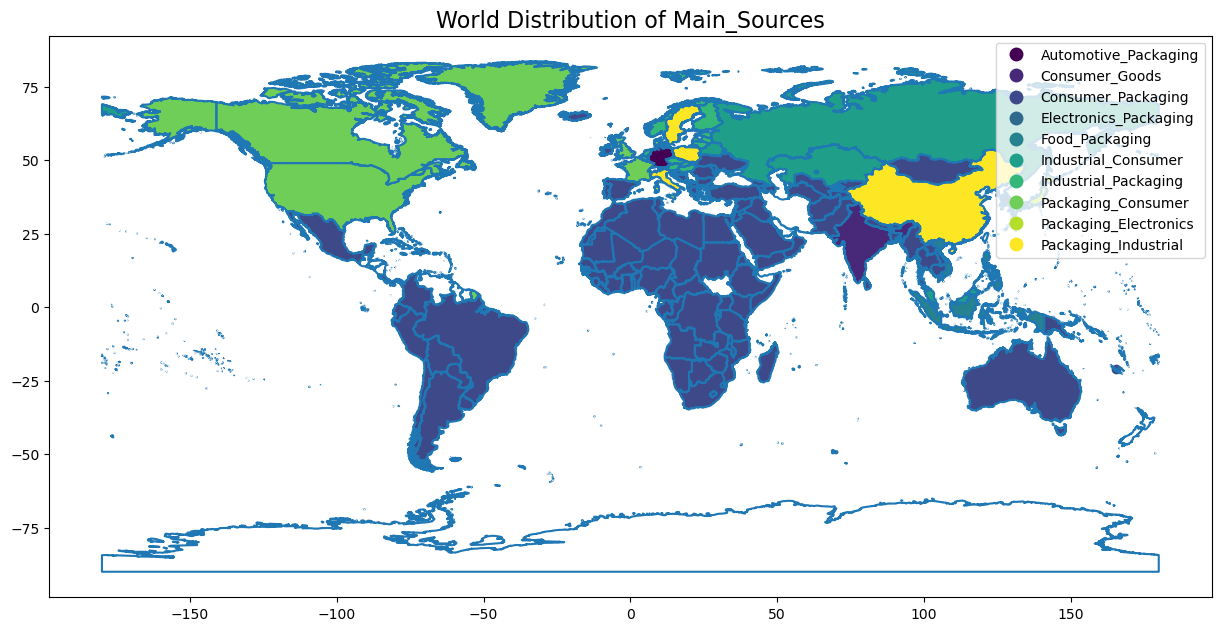

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax)
merged.plot(column='Main_Sources', ax=ax, legend=True, cmap='viridis')
plt.title('World Distribution of Main_Sources', fontsize=16)
plt.show()

## World Distribution of Recycling Rate with Top 10 Highlighted

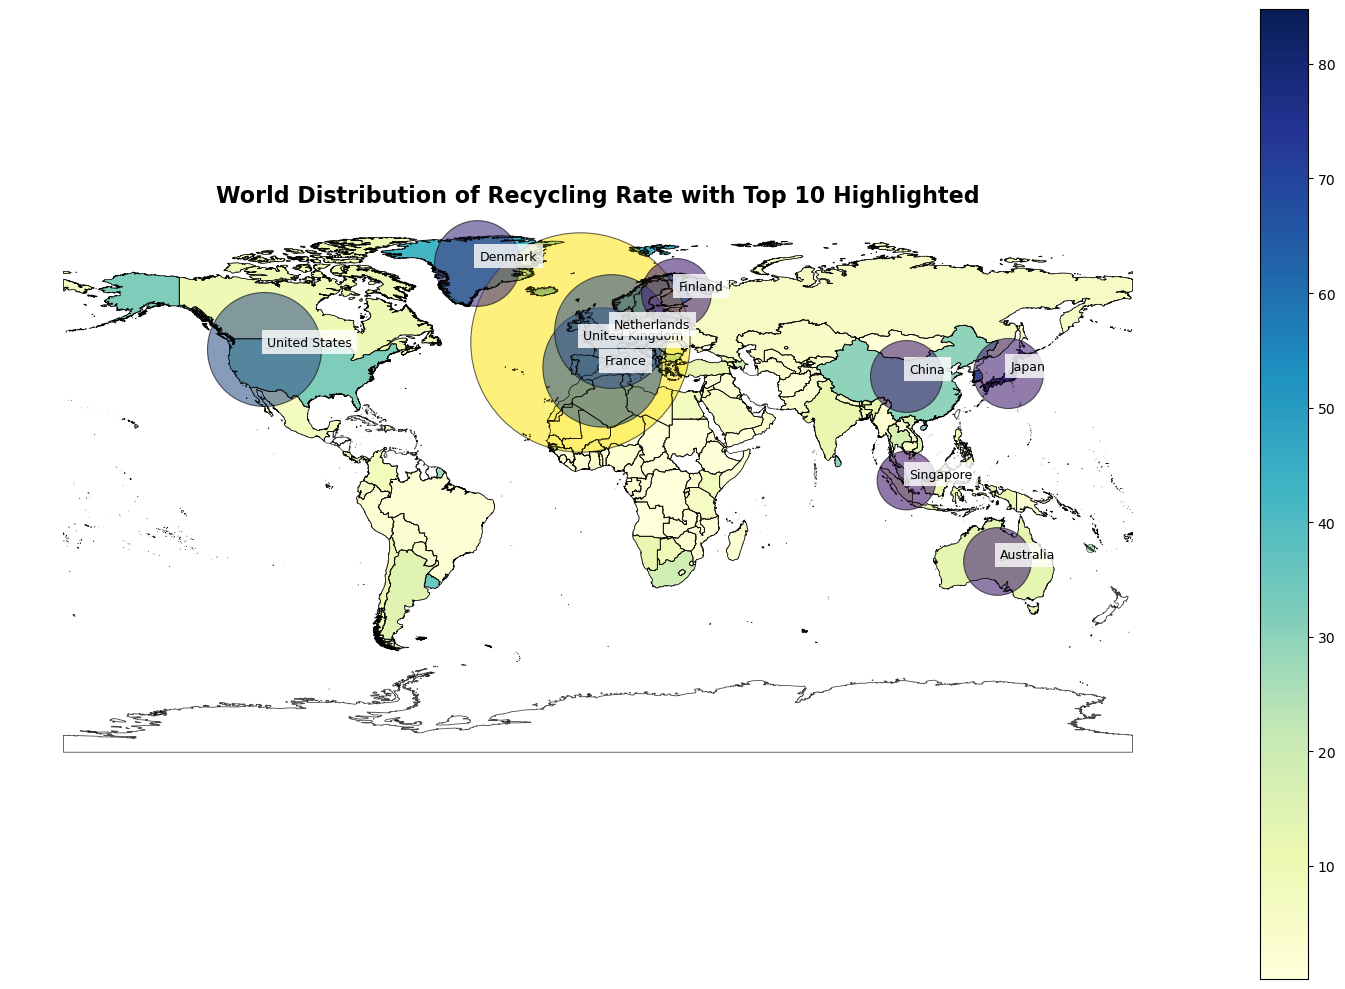

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plotting the map
merged.boundary.plot(ax=ax, linewidth=0.6, color='black', alpha=0.7)
merged.plot(column='Recycling_Rate', ax=ax, legend=True, cmap='YlGnBu', edgecolor='black', linewidth=0.3)

# Top 10 Highest Recycling Rate Countries
merged_dissolved = merged.dissolve(by='Country', aggfunc='sum').reset_index() 
top_10_Recycle_Countries = merged_dissolved.nlargest(10, 'Recycling_Rate')

for idx, row in top_10_Recycle_Countries.iterrows():
    if row.geometry.centroid:
        size = row['Recycling_Rate'] * 30  # Dynamic Size
        color = plt.cm.viridis(row['Recycling_Rate'] / top_10_Recycle_Countries['Recycling_Rate'].max())  # Gradient Color

        # Plot Circle with Transparency
        plt.scatter(row.geometry.centroid.x, row.geometry.centroid.y,
                    s=size, color=color, alpha=0.6, edgecolor='black', linewidth=0.8)

        # Adding Labels
        plt.annotate(row['Country'],
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     xytext=(row.geometry.centroid.x + 1, row.geometry.centroid.y + 1),
                     fontsize=9, color='black',
                     bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
                     arrowprops=dict(arrowstyle='-', color='black', lw=0.8))

plt.title("World Distribution of Recycling Rate with Top 10 Highlighted", fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

In [87]:
global_plastic.groupby('Main_Sources')['Total_Plastic_Waste_MT'].sum().sort_values(ascending = False)

Main_Sources
Consumer_Packaging       80.01
Packaging_Industrial     66.63
Packaging_Consumer       57.27
Consumer_Goods           26.33
Industrial_Packaging     16.51
Industrial_Consumer      10.43
Food_Packaging           10.02
Packaging_Electronics     7.99
Automotive_Packaging      6.28
Electronics_Packaging     2.91
Name: Total_Plastic_Waste_MT, dtype: float64

## Top Sources of Plastic Waste

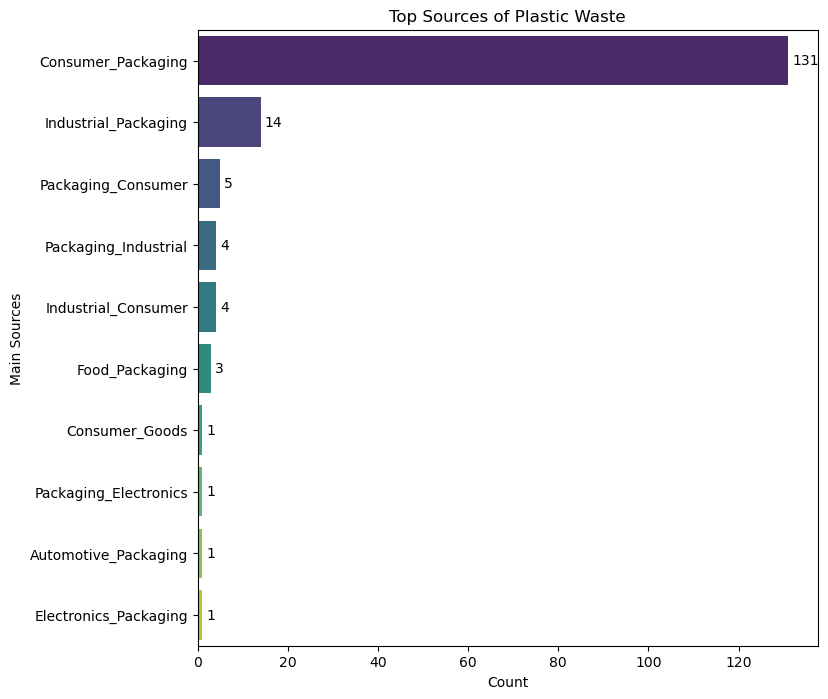

In [31]:
Top_source = global_plastic['Main_Sources'].value_counts()

plt.figure(figsize=(8, 8))
ax = sns.barplot(
    x=Top_source.values, 
    y=Top_source.index, 
    hue=Top_source.index, 
    palette='viridis'
)

for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=3)

plt.legend([], [], frameon=False)

# Customize plot
plt.xlabel("Count")
plt.ylabel("Main Sources")
plt.title("Top Sources of Plastic Waste")

plt.show()

- Consumer packaging is the largest contributor (131 cases), highlighting the environmental impact of single-use plastics.
- Industrial packaging (14 cases) is the second major source, but far behind consumer packaging.
- Other sources like food and electronics packaging contribute minimally, yet their waste still poses sustainability challenges.

### Lets do a Hypothesis Test

## Is there a significant difference in plastic waste production between two regions?

In [89]:
from scipy.stats import ttest_ind

# Splitting dataset into two groups
asia = global_plastic[global_plastic["Country"].isin(["India", "China", "Japan", "Indonesia"])]
europe = global_plastic[global_plastic["Country"].isin(["Germany", "UK", "France", "Italy"])]

# T-Test
t_stat, p_value = ttest_ind(asia["Total_Plastic_Waste_MT"], europe["Total_Plastic_Waste_MT"])

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference between Asia and Europe in plastic waste generation.")
else:
    print("No significant difference found.")


T-statistic: 1.3568025073824308, P-value: 0.23288410257123293
No significant difference found.


#### The p-value (0.2328) is greater than the common significance threshold (0.05), meaning there is no statistically significant difference in plastic waste generation between the selected Asian and European countries.

## Top 5 Countries by Coastal Waste Risk Category

C:\Users\pc\AppData\Local\Temp\ipykernel_14012\1109427108.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, "Total_Plastic_Waste_MT")))


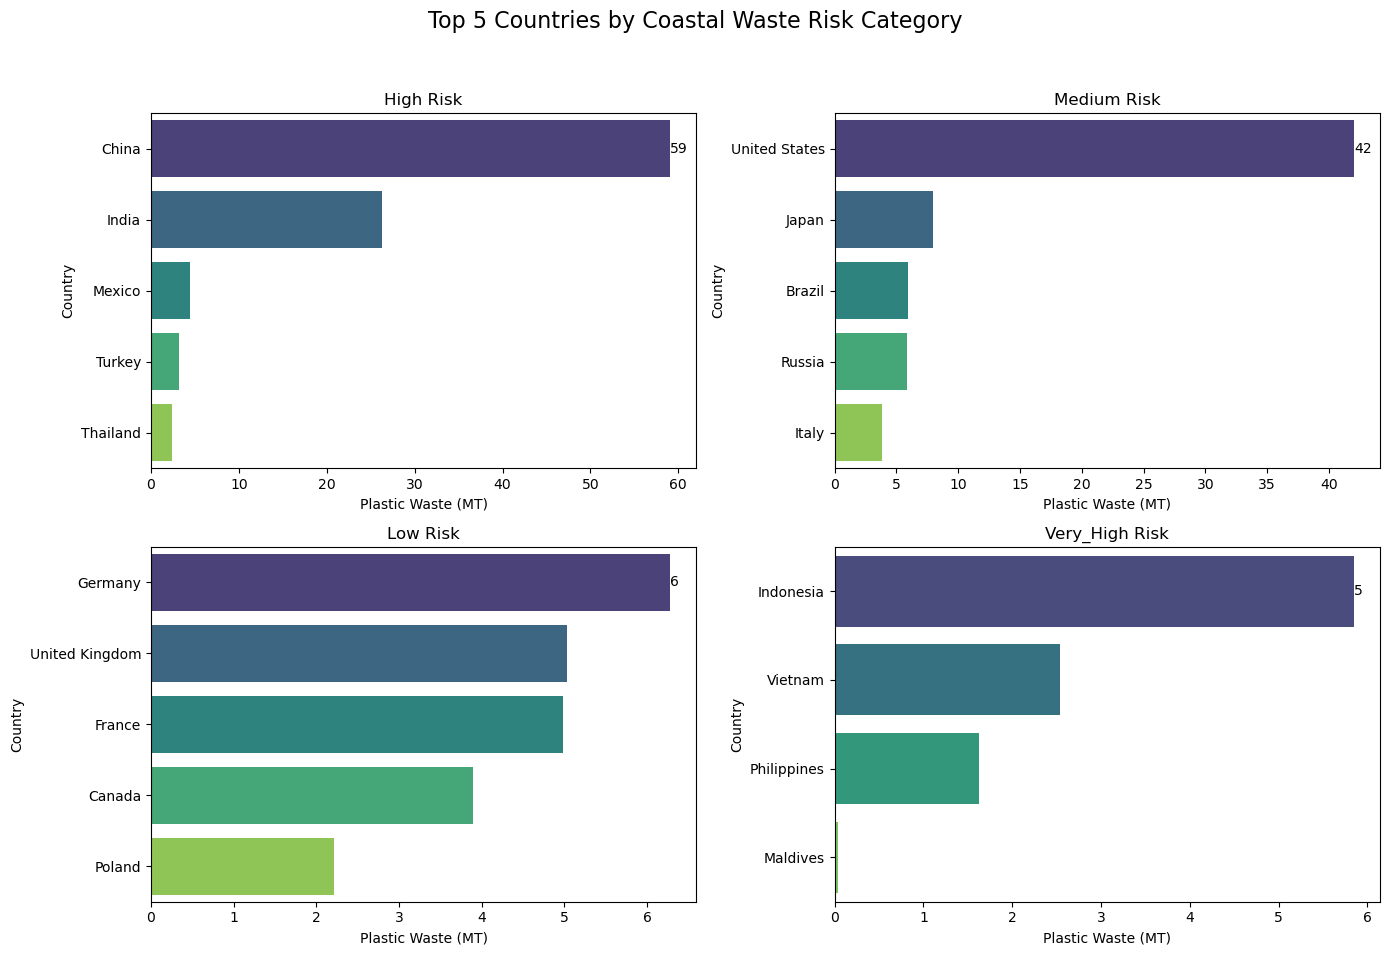

In [90]:
top_countries = (global_plastic.groupby("Coastal_Waste_Risk", group_keys=False)
                   .apply(lambda x: x.nlargest(5, "Total_Plastic_Waste_MT")))

# Risk Categories
categories = ["High", "Medium", "Low", "Very_High"]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Top 5 Countries by Coastal Waste Risk Category", fontsize=16)

# Plotting each category
for ax, cat in zip(axes.flatten(), categories):
    data = top_countries[top_countries["Coastal_Waste_Risk"] == cat]
    if not data.empty:
        sns.barplot(x="Total_Plastic_Waste_MT", y="Country", hue="Country", data=data, ax=ax, palette="viridis", legend=False)
        ax.set_title(f"{cat} Risk")
        ax.set_xlabel("Plastic Waste (MT)")
        ax.set_ylabel("Country")
        if ax.containers:
            ax.bar_label(ax.containers[0], fmt="%d")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- China and the U.S. contribute the most waste in High and Medium-Risk zones, worsening ocean plastic pollution.
- Germany and the U.K. lead in Low-Risk plastic waste, indicating better waste management but still notable contributions.
- Indonesia tops the Very High-Risk category, with Vietnam and the Philippines also being major contributors, likely due to inadequate waste management infrastructure.